Импорт модулей и инициализация визуализатора matplotlib.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Объявление констант.

In [2]:
URL_TO_DATA = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
DATA_DELIMITER = ","
NA_VALUE = "?"
COLUMNS_NAMES = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

Сбор данных с .data файла с удаленного сервера.

In [3]:
df = pd.read_csv(
    URL_TO_DATA,
    header=None,
    delimiter=DATA_DELIMITER,
    names=COLUMNS_NAMES,
    index_col=COLUMNS_NAMES[0],
    na_values=NA_VALUE,
    dtype={column: "object" for column in COLUMNS_NAMES[1:]}
)

Вывод первых строк таблицы на экран.

In [4]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Выведение базовой статистической информации по таблице (описание категориальное, т.к. все признаки в наборе данных категориальные).

In [5]:
data_describe = df.describe()
data_describe

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699,699,699,699,699,683,699,699,699,699
unique,10,10,10,10,10,10,10,10,9,2
top,1,1,1,1,2,1,2,1,1,2
freq,145,384,353,407,386,402,166,443,579,458


Замена пропущенных значений каждого нецелевого признака на самое часто встречающееся значение в признаке (мода признака), т.к. все признаки являются категориальными, а удаление объектов с пропущенными значениями привело бы к существенному обеднению выборки.

In [6]:
for column in COLUMNS_NAMES[1:]:
    top_value = df[column].describe()["top"]
    df[column] = df[column].fillna(top_value)

Снова выводим базовую статистическую информацию по выборке, замечаем, что теперь кол-ва объектов со всеми признаками уравнялись: пропущенных значений более нет.

In [7]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699,699,699,699,699,699,699,699,699,699
unique,10,10,10,10,10,10,10,10,9,2
top,1,1,1,1,2,1,2,1,1,2
freq,145,384,353,407,386,418,166,443,579,458


Строим количественные гистограммы по каждому признаку и сохраняем их в .png формате в директории plots, расположенной в той же директории, что и данный .ipynb файл.

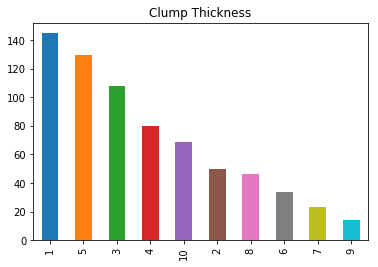

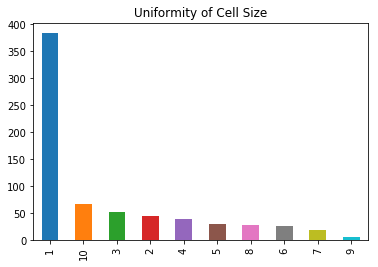

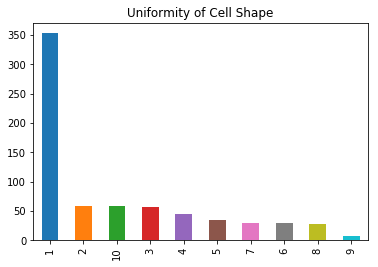

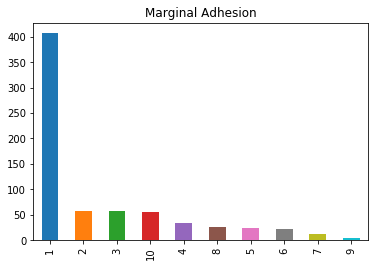

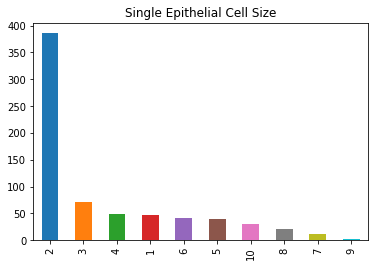

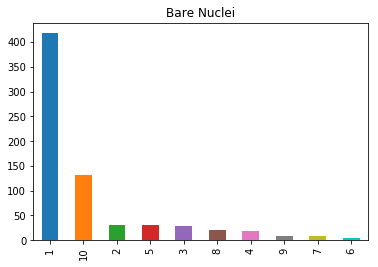

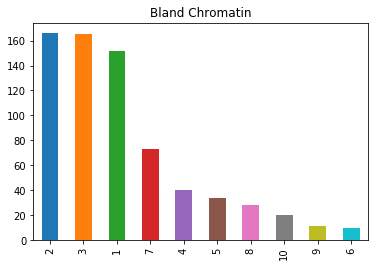

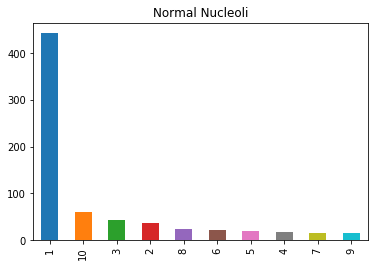

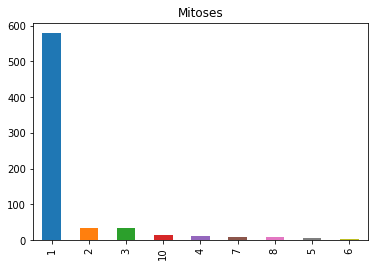

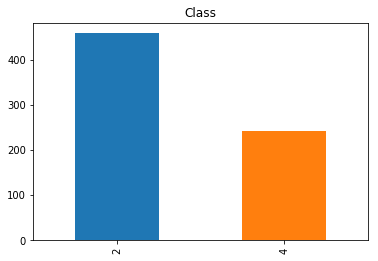

In [8]:
for column in COLUMNS_NAMES[1:]:
    df_plot = df[column].value_counts().plot(kind="bar", title=column)
    plt.show()
    fig = df_plot.get_figure()
    fig.savefig("plots/" + column.lower().replace(" ", "_") + ".png")


Выделяем наименования банарных и небинарных признаков, для дальнейшей работы с ними. Выводим кол-во признаков каждого вида (бинарные и небинарные соответственно), замечаем, что бинарным признаком в данной выборке является только целевой (class).

In [9]:
binary_columns = [column for column in COLUMNS_NAMES[1:] if data_describe[column]["unique"] == 2]
nonbinary_columns = [column for column in COLUMNS_NAMES[1:] if data_describe[column]["unique"] > 2]
len(binary_columns), len(nonbinary_columns)

(1, 9)

Проводим замену значений категориальных бинарных признаков на числовые (моде признака сопоставляем число 1, оставшемуся - 0) с помощью объявленной здесь же функции change_binary.

In [10]:
def change_binary(data, column_name, top_value):
    for default_value in data[column_name].unique():
        if default_value == top_value:
            data.loc[data[column_name] == default_value, column_name] = 1
        else:
            data.loc[data[column_name] == default_value, column_name] = 0
    return data[column_name]

binary_values = {}
for binary_column in binary_columns:
    binary_column_description = df[binary_column].describe()
    
    binary_values[binary_column] = {}
    binary_values[binary_column]["top"] = binary_column_description["top"]
    
    df[binary_column] = change_binary(
        df,
        binary_column,
        binary_values[binary_column]["top"]
    )

Выводим базовую статистическаю информацию по имеющемуся бинарному целевому признаку, замечаем, что замена прошла успешно.

In [11]:
df["Class"].describe()

count     699
unique      2
top         1
freq      458
Name: Class, dtype: int64

Проводим векторизацию категориальных небинарных признаков: если имеется признак feature, имеющий значения value_1, value_2, ..., value_n,
то заменяем этот признак на множество признаков feature_value_1, feature_value_2, ..., feature_value_n, которые принимают два значения: 1 или 0, указывающих на пренадлежность объекта тому или иному значению признака feature.

In [12]:
df_nonbinary = pd.get_dummies(df[nonbinary_columns])

In [13]:
df_nonbinary.shape

(699, 89)

Соединяем все полученные части набора данных в один.

In [14]:
df = pd.concat((df_nonbinary, df[binary_columns]), axis=1)
df = pd.DataFrame(df, dtype="float")

Выводим информацию по полученному набору данных: размерность (кол-во строк, кол-во столбцов), наименования колонок (полученные признаки), типы колонок (все числовые - float64).

In [15]:
print(df.shape, df.columns, df.dtypes, sep="\n\n")

(699, 90)

Index(['Clump Thickness_1', 'Clump Thickness_10', 'Clump Thickness_2',
       'Clump Thickness_3', 'Clump Thickness_4', 'Clump Thickness_5',
       'Clump Thickness_6', 'Clump Thickness_7', 'Clump Thickness_8',
       'Clump Thickness_9', 'Uniformity of Cell Size_1',
       'Uniformity of Cell Size_10', 'Uniformity of Cell Size_2',
       'Uniformity of Cell Size_3', 'Uniformity of Cell Size_4',
       'Uniformity of Cell Size_5', 'Uniformity of Cell Size_6',
       'Uniformity of Cell Size_7', 'Uniformity of Cell Size_8',
       'Uniformity of Cell Size_9', 'Uniformity of Cell Shape_1',
       'Uniformity of Cell Shape_10', 'Uniformity of Cell Shape_2',
       'Uniformity of Cell Shape_3', 'Uniformity of Cell Shape_4',
       'Uniformity of Cell Shape_5', 'Uniformity of Cell Shape_6',
       'Uniformity of Cell Shape_7', 'Uniformity of Cell Shape_8',
       'Uniformity of Cell Shape_9', 'Marginal Adhesion_1',
       'Marginal Adhesion_10', 'Marginal Adhesion_2', 'Marginal A

Разбиваем выборку на две части: 70% данных отводится под обучение алгоритмов, оставшиеся 30% - на тесты. X_train, X_test соответствуют части выборки с нецелевыми признаками, y_train и y_test - с целевым признаком.

In [16]:
from sklearn.model_selection import train_test_split
X, y = df.drop((COLUMNS_NAMES[-1]), axis=1), df[COLUMNS_NAMES[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [17]:
X_train.shape[0], X_test.shape[0]

(489, 210)

Приводим и обучаем алгоритм метода k ближайших соседей (с количеством соседей, равным 5).

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Вводим функцию вывода на экран ошибки алгоритма в процентном виде.
Предсказываем значения целевого признака на объектах обучающей выборки и тестовой выборки, получаем результат кол-ва ошибок, не превышающий 6.7% на тестовой выборке.

In [20]:
def show_errors(train_data_error, test_data_error):
    print(
        "Train data error: " + str(train_data_error*100) + " %", 
        "Test data error: " + str(test_data_error*100) + " %",
        sep="\n"
    )
y_train_predicted = knn.predict(X_train)
y_test_predicted = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predicted)
err_test = np.mean(y_test  != y_test_predicted)

show_errors(err_train, err_test)

Train data error: 4.294478527607362 %
Test data error: 6.666666666666667 %


Вводим алгоритм выбора набора оптимальных параметров (кол-во соседей) для алгоритма k ближайших соседей. Лучший результат ошибки из всех параметров (целочисленный отрезок [1; 19] за исключением 5) - 4.5% с параметром 4 соседей. 

In [21]:
from sklearn.model_selection import GridSearchCV
n_neighbors_list = list(range(1, 20))
n_neighbors_list.remove(5)
n_neighbors_list

[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_list})
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.04498977505112478, 4)

In [24]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

show_errors(err_train, err_test)

Train data error: 2.8629856850715747 %
Test data error: 4.761904761904762 %


In [25]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
err_train = np.mean(y_train != svc_model.predict(X_train))
err_test = np.mean(y_test != svc_model.predict(X_test))

show_errors(err_train, err_test)

Train data error: 2.2494887525562373 %
Test data error: 2.857142857142857 %


In [27]:
c_parameter_array = np.logspace(-3, 3, num=7)
gamma_parameter_array = np.logspace(-5, 2, num=8)

svc_model = SVC(kernel="rbf")

grid = GridSearchCV(
    svc_model,
    param_grid={
        "C": c_parameter_array,
        "gamma": gamma_parameter_array
    }
)
grid.fit(X_train, y_train)

best_svc_error = 1 - grid.best_score_
best_svc_c = grid.best_estimator_.C
best_svc_gamma = grid.best_estimator_.gamma

print("Cross validation error:", best_svc_error * 100, "%")
print("Best C parameter:", best_svc_c)
print("Best gamma parameter:", best_svc_gamma)

Cross validation error: 3.0674846625766916 %
Best C parameter: 1.0
Best gamma parameter: 0.01


In [28]:
svc_model = SVC(
    kernel="rbf",
    C=best_svc_c,
    gamma=best_svc_gamma
)

svc_model.fit(X_train, y_train)

err_train = np.mean(svc_model.predict(X_train) != y_train)
err_test = np.mean(svc_model.predict(X_test) != y_test)

show_errors(err_train, err_test)

Train data error: 2.2494887525562373 %
Test data error: 2.857142857142857 %


In [29]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

show_errors(err_train, err_test)

Train data error: 0.0 %
Test data error: 3.3333333333333335 %
